<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_Flood/blob/master/4_SED_censusdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delaware Social Factors by Census Tract, Block Group, Block

[Link](https://jtleider.github.io/censusdata/example1.html)

In [ ]:
!pip install censusdata

     |████████████████████████████████| 23.2MB 35.0MB/s 
  Created wheel for censusdata: filename=CensusData-1.8-cp36-none-any.whl size=24706121 sha256=f1da6a6f488e4900747bb975b0d45ae5abbc630d5e4dc9a4afedc56627067313
  Stored in directory: /root/.cache/pip/wheels/76/04/a7/086077b0f4dee8f4c81dc16389b84a1add31d6626f3e0985fd
Successfully built censusdata


In [ ]:
import censusdata
import pandas as pd
import numpy as np

# Median Income

In [ ]:
censusdata.censustable('acs5', 2015, 'B19049')
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19049'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19049_001E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_002E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_003E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_004E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
B19049_005E  | B19049. Median Household Incom | !! Median household income in the past 12 months (in 201 | int  
-------------------------------------------------------------------------------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2645a908>]],
      dtype=object)

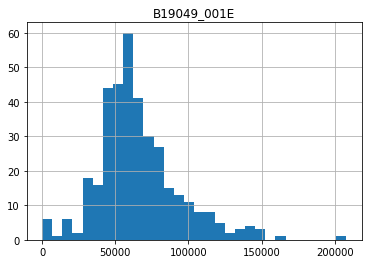

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2015)
income_cblkg = censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B19049_001E"])
de_income_cblkg  = pd.concat([censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B19049_001E"]) for i in ["003", "001", "005"]])
de_income_cblkg 
de_income_cblkg.clip(0, 1e9).hist(["B19049_001E"], bins=30)

# Race

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B02001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | B02001.  Race                  | Total:                                                   | int  
B02001_002E  | B02001.  Race                  | White alone                                              | int  
B02001_003E  | B02001.  Race                  | Black or African American alone                          | int  
B02001_004E  | B02001.  Race                  | American Indian and Alaska Native alone                  | int  
B02001_005E  | B02001.  Race                  | Asian alone                                              | int  
B02001_006E  | B02001.  Race                  | Native Hawaiian and Other Pacific Islander alone         | int  
B02001_007E  | B02001.  Race                  | Some other race alone                        

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2015)
race_cblkg = censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B02001_001E", "B02001_002E"])
de_race_cblkg  = pd.concat([censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B02001_001E", "B02001_002E"]) for i in ["003", "001", "005"]])
de_race_cblkg['per_white'] = de_race_cblkg["B02001_002E"] / de_race_cblkg["B02001_001E"] * 100
de_race_cblkg['per_nonwhite'] = (de_race_cblkg["B02001_001E"] - de_race_cblkg["B02001_002E"])/de_race_cblkg["B02001_001E"] *100
de_race_cblkg = de_race_cblkg[['per_white', 'per_nonwhite']].dropna()
de_race_cblkg

,per_white,per_nonwhite
"Block Group 2, Census Tract 102, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010200> block group:2",57.938144,42.061856
"Block Group 1, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:1",89.495366,10.504634
"Block Group 2, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:2",55.073222,44.926778
"Block Group 3, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:3",50.515464,49.484536
"Block Group 1, Census Tract 104, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010400> block group:1",93.717949,6.282051
...,...,...
"Block Group 2, Census Tract 518.01, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051801> block group:2",78.235025,21.764975
"Block Group 1, Census Tract 518.02, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051802> block group:1",42.200957,57.799043
"Block Group 2, Census Tract 518.02, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051802> block group:2",68.238994,31.761006
"Block Group 1, Census Tract 519, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051900> block group:1",91.909814,8.090186


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c245042b0>]],
      dtype=object)

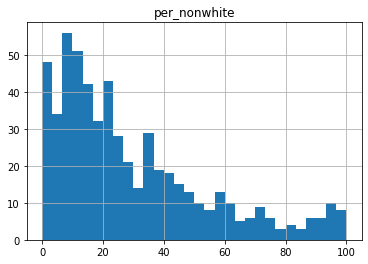

In [ ]:
de_race_cblkg.clip(0, 1e9).hist(["per_nonwhite"], bins=30)

# Poverty Rate

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B17010'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17010_001E  | B17010. Poverty Status in the  | Total:                                                   | int  
B17010_002E  | B17010. Poverty Status in the  | Income in the past 12 months below poverty level:        | int  
B17010_003E  | B17010. Poverty Status in the  | !! Income in the past 12 months below poverty level: Mar | int  
B17010_004E  | B17010. Poverty Status in the  | !! !! Income in the past 12 months below poverty level:  | int  
B17010_005E  | B17010. Poverty Status in the  | !! !! !! Income in the past 12 months below poverty leve | int  
B17010_006E  | B17010. Poverty Status in the  | !! !! !! Income in the past 12 months below poverty leve | int  
B17010_007E  | B17010. Poverty Status in the  | !! !! !! Income in the past 12 months below p

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2015)
poverty_cblkg = censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', '001'), ('block group', '*')]), ["B17010_001E", "B17010_002E"])
de_poverty_cblkg  = pd.concat([censusdata.download('acs5', 2015, censusdata.censusgeo([('state', '10'), ('county', i), ('block group', '*')]), ["B17010_001E", "B17010_002E"]) for i in ["003", "001", "005"]])
de_poverty_cblkg['per_below_povlev'] = de_poverty_cblkg["B17010_002E"] / de_poverty_cblkg["B17010_001E"] * 100
de_poverty_cblkg = de_poverty_cblkg[['per_below_povlev']].dropna()
de_poverty_cblkg

,per_below_povlev
"Block Group 2, Census Tract 102, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010200> block group:2",0.000000
"Block Group 1, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:1",4.566210
"Block Group 2, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:2",8.600000
"Block Group 3, Census Tract 103, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010300> block group:3",22.058824
"Block Group 1, Census Tract 104, New Castle County, Delaware: Summary level: 150, state:10> county:003> tract:010400> block group:1",0.000000
...,...
"Block Group 2, Census Tract 518.01, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051801> block group:2",16.040956
"Block Group 1, Census Tract 518.02, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051802> block group:1",25.644172
"Block Group 2, Census Tract 518.02, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051802> block group:2",6.526807
"Block Group 1, Census Tract 519, Sussex County, Delaware: Summary level: 150, state:10> county:005> tract:051900> block group:1",1.895735


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c23f0c240>]],
      dtype=object)

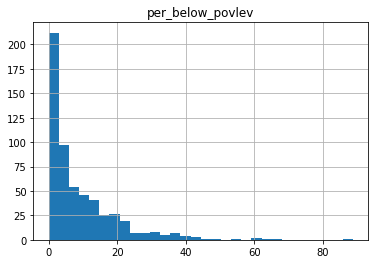

In [ ]:
de_poverty_cblkg.clip(0, 1e9).hist(["per_below_povlev"], bins=30)